In [3]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Assuming the uploaded file is 'Election dataset.xlsx'
file_path = 'Election dataset.xlsx'

# Load the Excel file into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
data.head()


,Unnamed: 0,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Percentage of Votes,Constituency,State/UT
0,1,Bishnu Pada Ray,Bharatiya Janata Party,102182,254,102436,50.58,Andaman and Nicobar Islands-1,Andaman and Nicobar Island
1,2,Kuldeep Rai Sharma,Indian National Congress,77829,211,78040,38.54,Andaman and Nicobar Islands-1,Andaman and Nicobar Island
2,3,Manoj Paul,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman and Nicobar Islands-1,Andaman and Nicobar Island
3,4,D Ayyapan,Communist Party of India(Marxist),6009,8,6017,2.97,Andaman and Nicobar Islands-1,Andaman and Nicobar Island
4,5,V.K.Abdul Aziz,Independent,2195,8,2203,1.09,Andaman and Nicobar Islands-1,Andaman and Nicobar Island


In [7]:

# Check for non-numeric values in 'EVM Votes' column
non_numeric_votes = data['EVM Votes'][pd.to_numeric(data['EVM Votes'], errors='coerce').isna()]

# Handle non-numeric values
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'], errors='coerce').fillna(0)
data['Postal Votes'] = pd.to_numeric(data['Postal Votes'], errors='coerce').fillna(0)
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce').fillna(0)
data['Percentage of Votes'] = pd.to_numeric(data['Percentage of Votes'], errors='coerce').fillna(0)

# Remove rows with missing categorical values
data.dropna(subset=['Candidate', 'Party', 'Constituency', 'State/UT'], inplace=True)


In [8]:
# Convert 'Total Votes' column to numeric, coercing errors to NaN
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce')

# Group the data by State/UT and calculate the total votes for each state
state_votes=data.groupby('State/UT')['Total Votes'].sum()
print(state_votes)

State/UT
Andaman and Nicobar Island                202514.0
Andhra Pradesh                          33729342.0
Arunachal Pradesh                         723247.0
Assam                                   20059870.0
Bihar                                   43448949.0
Chandigarh                                449275.0
Chhattisgarh                            15061348.0
Dadra & Nagar Haveli and Daman & Diu      297998.0
Goa                                       906538.0
Gujarat                                 29115599.0
Haryana                                 13055572.0
Himachal Pradesh                         4069906.0
Jammu and Kashmir                        5151193.0
Jharkhand                               17241982.0
Karnataka                               37464681.0
Kerala                                  19980436.0
Ladakh                                    135524.0
Lakshadweep                                49200.0
Madhya Pradesh                          37940251.0
Maharashtra           

In [9]:
max_votes_state = state_votes.idxmax()
max_votes = state_votes.max()

print(f"The state/UT with the maximum number of votes is {max_votes_state} with {max_votes} votes.")

The state/UT with the maximum number of votes is Uttar Pradesh with 87911642.0 votes.


In [10]:
min_votes_state = state_votes.idxmin()
min_votes = state_votes.min()

print(f"The state/UT with the minimum number of votes is {min_votes_state} with {min_votes} votes.")

The state/UT with the minimum number of votes is Lakshadweep with 49200.0 votes.


In [14]:
max_votes_per_state = data.loc[election_data.groupby('State/UT')['Total Votes'].idxmax()]
winning_parties = max_votes_per_state[['State/UT', 'Candidate', 'Party', 'Total Votes']]
winning_parties.reset_index(drop=True, inplace=True)

# Display the winning parties
print(winning_parties)

                                State/UT                    Candidate  \
0             Andaman and Nicobar Island              Bishnu Pada Ray   
1                         Andhra Pradesh        SRIBHARAT MATHUKUMILI   
2                      Arunachal Pradesh                 KIREN RIJIJU   
3                                  Assam              RAKIBUL HUSSAIN   
4                                  Bihar                GIRIRAJ SINGH   
5                             Chandigarh                MANISH TEWARI   
6                           Chhattisgarh            BRIJMOHAN AGRAWAL   
7   Dadra & Nagar Haveli and Daman & Diu     DELKAR KALABEN MOHANBHAI   
8                                    Goa           SHRIPAD YESSO NAIK   
9                                Gujarat                    C R PATIL   
10                               Haryana           RAO INDERJIT SINGH   
11                      Himachal Pradesh           DR RAJEEV BHARDWAJ   
12                     Jammu and Kashmir           

In [12]:
election_data = data.dropna(subset=['Total Votes'])

# Calculate the overall voter turnout
overall_voter_turnout = election_data['Total Votes'].sum()

# Display the overall voter turnout
print("Overall Voter Turnout:", overall_voter_turnout)


Overall Voter Turnout: 644034509.0


In [54]:
# prompt: constituency with the least vote difference

import pandas as pd
# Calculate the difference in votes between the first and second candidates for each constituency
data['Vote_diff'] = data.groupby('Constituency')['Total Votes'].transform(pd.Series.diff).fillna(0)

# Find the constituency with the least vote difference
least_diff_constituency = data[data['Vote_diff'] == data['Vote_diff'].min()]['Constituency'].values[0]

# Get the candidate and party names for the constituency with the least vote difference
winner_candidate = data[data['Constituency'] == least_diff_constituency]['Candidate'].iloc[0]
winner_party = data[data['Constituency'] == least_diff_constituency]['Party'].iloc[0]

# Print the results
print(f"Constituency with the least vote difference: {least_diff_constituency}")
print(f"Winner candidate: {winner_candidate}")
print(f"Winner party: {winner_party}")


Constituency with the least vote difference:  INDORE
Winner candidate: SHANKAR LALWANI
Winner party: Bharatiya Janata Party


In [55]:
# prompt: the constituency with the highest number of vote diffrence between first and second candidate is with their and party name

import pandas as pd

# Calculate the difference in votes between the first and second candidates for each constituency
data['Vote_diff'] = data.groupby('Constituency')['Total Votes'].transform(pd.Series.diff).fillna(0)

# Find the constituency with the highest vote difference
highest_diff_constituency = data[data['Vote_diff'] == data['Vote_diff'].max()]['Constituency'].values[0]

# Get the candidate and party names for the constituency with the highest vote difference
winner_candidate = data[data['Constituency'] == highest_diff_constituency]['Candidate'].iloc[0]
winner_party = data[data['Constituency'] == highest_diff_constituency]['Party'].iloc[0]

# Print the results
print(f"Constituency with the highest vote difference: {highest_diff_constituency}")
print(f"Winner candidate: {winner_candidate}")
print(f"Winner party: {winner_party}")


Constituency with the highest vote difference: Maharajganj
Winner candidate: JANARDAN SINGH "SIGRIWAL"
Winner party: Bharatiya Janata Party


In [13]:
election_data_sorted = data.sort_values(by=['State/UT', 'Total Votes'], ascending=[True, False])

# Group by State/UT and calculate the difference between the top two candidates
top_two_candidates = election_data_sorted.groupby('State/UT').head(2)

# Compute the difference
top_two_candidates['Rank'] = top_two_candidates.groupby('State/UT')['Total Votes'].rank(method='first', ascending=False)
vote_diff = top_two_candidates[top_two_candidates['Rank'] == 1].set_index('State/UT')['Total Votes'] - top_two_candidates[top_two_candidates['Rank'] == 2].set_index('State/UT')['Total Votes']
vote_diff = vote_diff.reset_index()
vote_diff.columns = ['State/UT', 'Vote Difference']

# Find the state with the highest vote difference
max_vote_diff = vote_diff.loc[vote_diff['Vote Difference'].idxmax()]

# Get the details of the candidates from this state
state_with_max_diff = max_vote_diff['State/UT']
candidates_max_diff = election_data_sorted[election_data_sorted['State/UT'] == state_with_max_diff]

# Extract the first and second candidates
first_candidate = candidates_max_diff.iloc[0]
second_candidate = candidates_max_diff.iloc[1]

# Prepare the result
result = {
    'State/UT': state_with_max_diff,
    'First Candidate': first_candidate['Candidate'],
    'First Candidate Votes': first_candidate['Total Votes'],
    'Second Candidate': second_candidate['Candidate'],
    'Second Candidate Votes': second_candidate['Total Votes'],
    'Vote Difference': max_vote_diff['Vote Difference']
}

# Display the result
print(result)

{'State/UT': 'Assam', 'First Candidate': 'RAKIBUL HUSSAIN', 'First Candidate Votes': 1471885.0, 'Second Candidate': 'KAMAKHYA PRASAD TASA', 'Second Candidate Votes': 897043.0, 'Vote Difference': 574842.0}


C:\Users\Jeslin\AppData\Local\Temp\ipykernel_11100\2803691765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_two_candidates['Rank'] = top_two_candidates.groupby('State/UT')['Total Votes'].rank(method='first', ascending=False)


In [15]:
total_votes_per_party = election_data.groupby('Party')['Total Votes'].sum().reset_index()

# Find the party with the most votes
party_with_most_votes = total_votes_per_party.loc[total_votes_per_party['Total Votes'].idxmax()]

# Display the party with the most votes
print("Party with the most votes:")
print(party_with_most_votes)

Party with the most votes:
Party          Bharatiya Janata Party
Total Votes               235356781.0
Name: 158, dtype: object


In [16]:

# Find the party with the most votes
party_with_least_votes = total_votes_per_party.loc[total_votes_per_party['Total Votes'].idxmin()]

# Display the party with the most votes
print("Party with the laest votes:")
print(party_with_least_votes)

Party with the laest votes:
Party          Indian Praja Congress
Total Votes                    141.0
Name: 297, dtype: object


In [21]:
import pandas as pd

# Sort the data by state/UT and total votes in descending order
election_data_sorted = data.sort_values(by=['State/UT', 'Total Votes'], ascending=[True, False])

# Attempt to convert 'Total Votes' to numeric, coercing errors
election_data_sorted['Total Votes'] = pd.to_numeric(election_data_sorted['Total Votes'], errors='coerce')

# Group by State/UT and calculate the difference between the top two candidates
top_two_candidates = election_data_sorted.groupby('State/UT').head(2)

# Compute the difference and reshape for merging
vote_diff = (top_two_candidates[top_two_candidates.groupby('State/UT')['Total Votes'].rank(method='first', ascending=False) == 1]
             .set_index('State/UT')['Total Votes'] 
             - top_two_candidates[top_two_candidates.groupby('State/UT')['Total Votes'].rank(method='first', ascending=False) == 2]
             .set_index('State/UT')['Total Votes'])
vote_diff = vote_diff.reset_index(name='Vote Difference')

# Get the winning party details (directly from top_two_candidates)
winning_parties = top_two_candidates[top_two_candidates.groupby('State/UT')['Total Votes'].rank(method='first', ascending=False) == 1][['State/UT', 'Party', 'Total Votes']]

# Combine margin of victory with the winning party details
combined_results = pd.merge(winning_parties, vote_diff, on='State/UT')

# Display the combined results
print(combined_results)

                                State/UT                         Party  \
0             Andaman and Nicobar Island        Bharatiya Janata Party   
1                         Andhra Pradesh                  Telugu Desam   
2                      Arunachal Pradesh        Bharatiya Janata Party   
3                                  Assam      Indian National Congress   
4                                  Bihar        Bharatiya Janata Party   
5                             Chandigarh      Indian National Congress   
6                           Chhattisgarh        Bharatiya Janata Party   
7   Dadra & Nagar Haveli and Daman & Diu        Bharatiya Janata Party   
8                                    Goa        Bharatiya Janata Party   
9                                Gujarat        Bharatiya Janata Party   
10                               Haryana        Bharatiya Janata Party   
11                      Himachal Pradesh        Bharatiya Janata Party   
12                     Jammu and Kashm

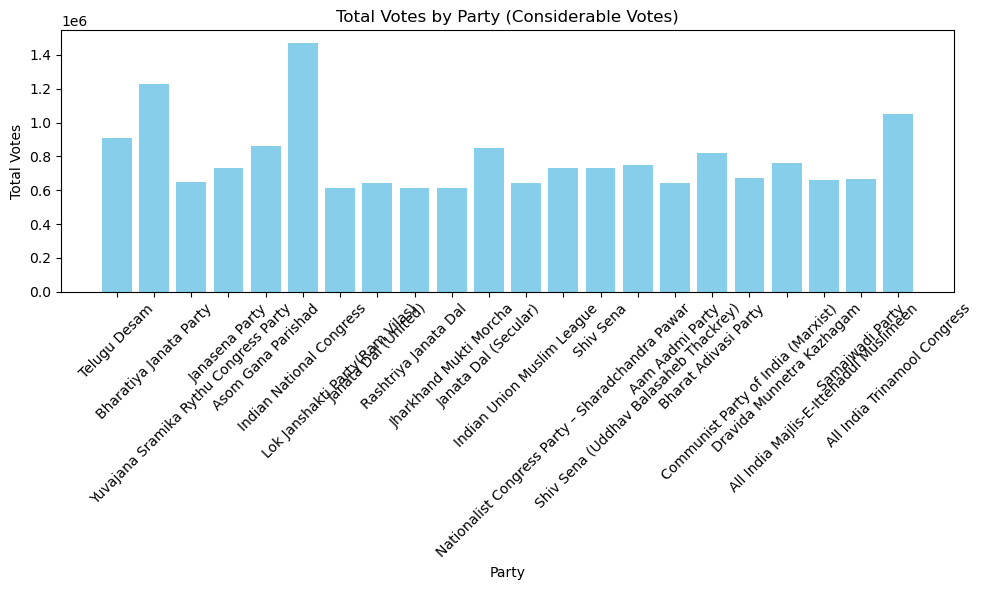

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter parties with considerable votes
threshold = 600000  # Adjust as per your dataset
filtered_df = data[data['Total Votes'] >= threshold]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Party'], filtered_df['Total Votes'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.title('Total Votes by Party (Considerable Votes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

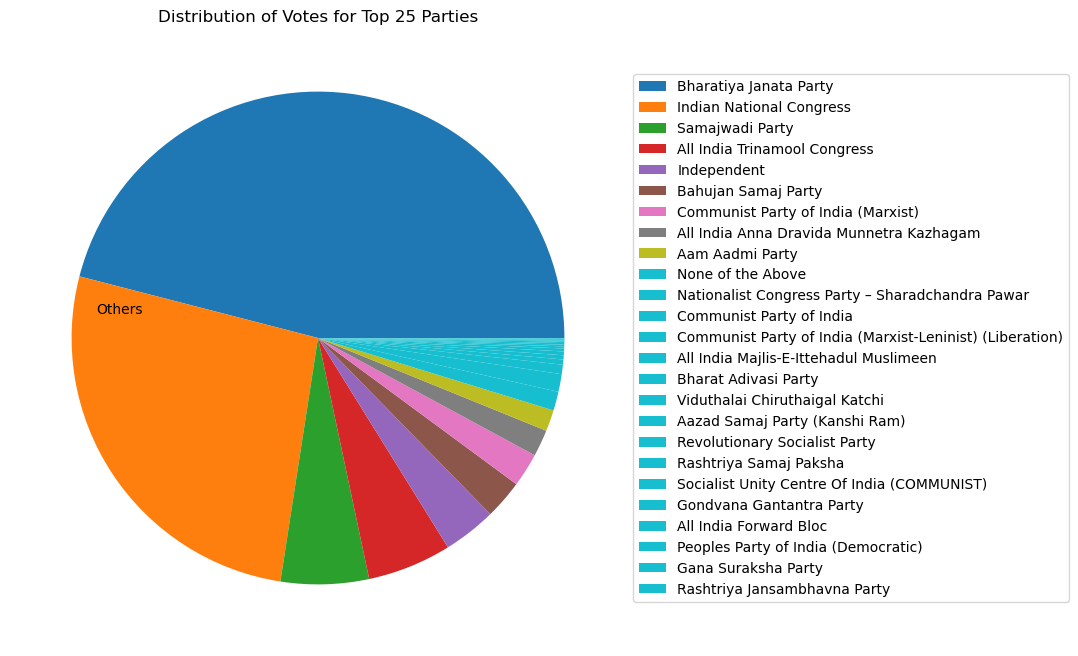

In [25]:

import matplotlib.pyplot as plt

# Filter parties appearing in more than two states or with highest votes in a state
parties_to_plot = []
for party, group in data.groupby('Party'):
    if len(group['State/UT'].unique()) > 2 or group['Total Votes'].max() == data.groupby('State/UT')['Total Votes'].max().max():
        parties_to_plot.append(party)

# Filter data for top 25 parties
top_25_parties = data[data['Party'].isin(parties_to_plot)].groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(25)

# Create a dictionary with party names and colors
party_colors = {
    party: plt.cm.tab10(i) for i, party in enumerate(top_25_parties.index)
}

# Create the pie chart
plt.figure(figsize=(15, 8))
wedges, texts = plt.pie(top_25_parties, labels=None, colors=[party_colors[party] for party in top_25_parties.index])

# Add party names and colors to the side
plt.legend(wedges, top_25_parties.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Add text labels for small values
plt.text(-0.9, 0.1, 'Others', fontsize=10)

# Add title and show the plot
plt.title('Distribution of Votes for Top 25 Parties')
plt.show()



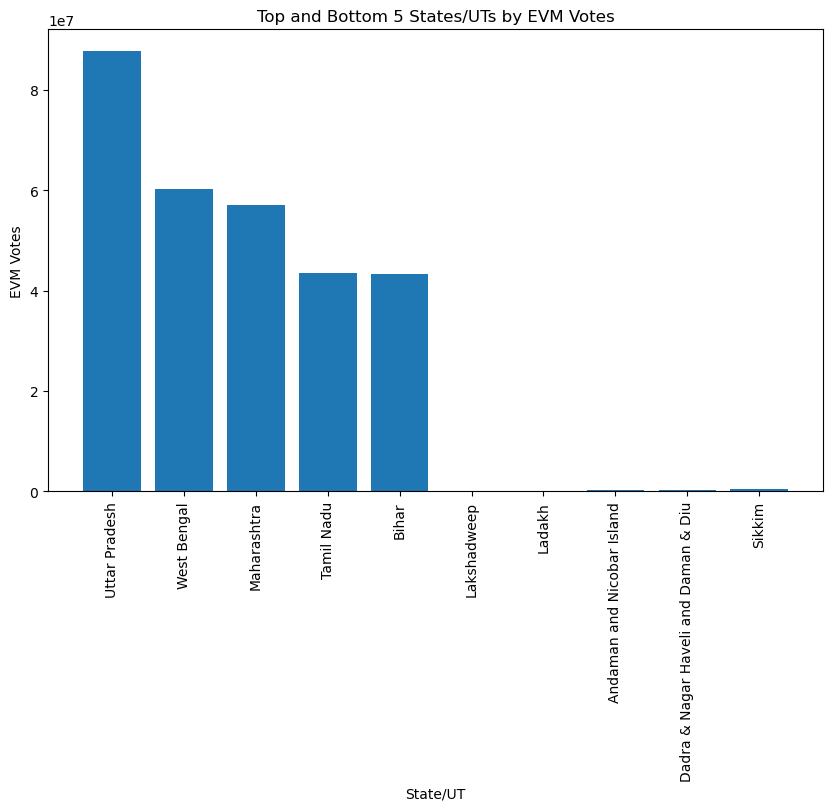

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
# Find the top 5 and bottom 5 states/UTs by EVM votes
top_5_states = data.groupby('State/UT')['EVM Votes'].sum().sort_values(ascending=False).head(5)
bottom_5_states = data.groupby('State/UT')['EVM Votes'].sum().sort_values().head(5)

# Combine the top and bottom states/UTs into a single DataFrame
selected_states = pd.concat([top_5_states, bottom_5_states]).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_states['State/UT'], selected_states['EVM Votes'])

# Add labels and title
plt.xlabel('State/UT')
plt.ylabel('EVM Votes')
plt.title('Top and Bottom 5 States/UTs by EVM Votes')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


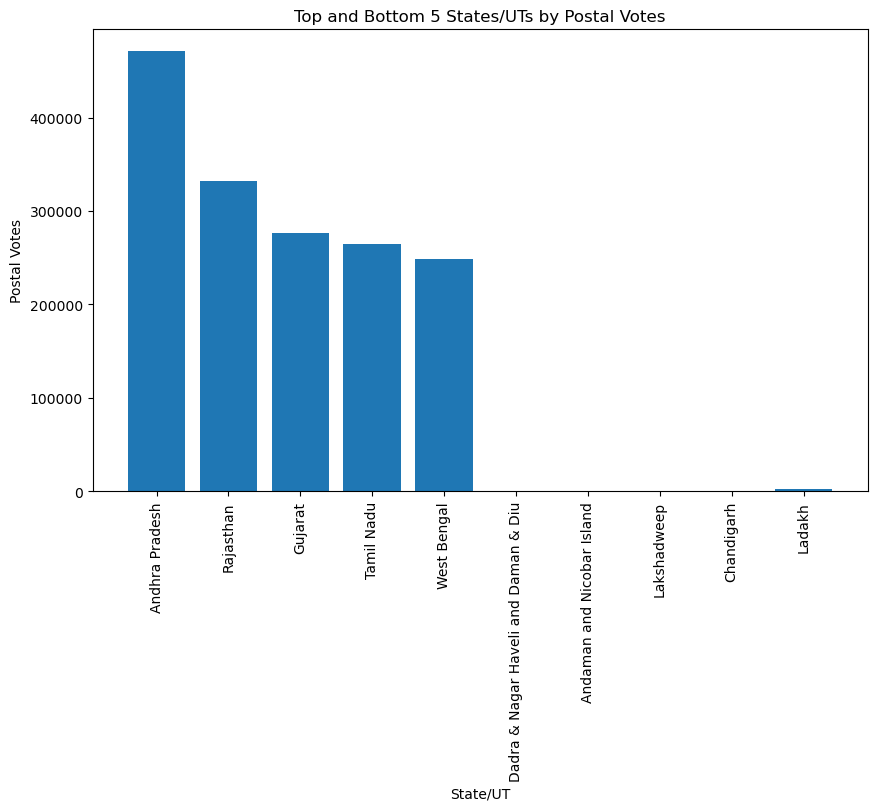

In [27]:

# Find the top 5 and bottom 5 states/UTs by Postal votes
top_5_states_postal = data.groupby('State/UT')['Postal Votes'].sum().sort_values(ascending=False).head(5)
bottom_5_states_postal = data.groupby('State/UT')['Postal Votes'].sum().sort_values().head(5)

# Combine the top and bottom states/UTs into a single DataFrame
selected_states_postal = pd.concat([top_5_states_postal, bottom_5_states_postal]).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_states_postal['State/UT'], selected_states_postal['Postal Votes'])

# Add labels and title
plt.xlabel('State/UT')
plt.ylabel('Postal Votes')
plt.title('Top and Bottom 5 States/UTs by Postal Votes')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


C:\Users\Jeslin\AppData\Local\Temp\ipykernel_11100\1597968455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bjp_data['Total Votes'] = pd.to_numeric(bjp_data['Total Votes'], errors='coerce').fillna(0)
C:\Users\Jeslin\AppData\Local\Temp\ipykernel_11100\1597968455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data['Total Votes'] = pd.to_numeric(inc_data['Total Votes'], errors='coerce').fillna(0)


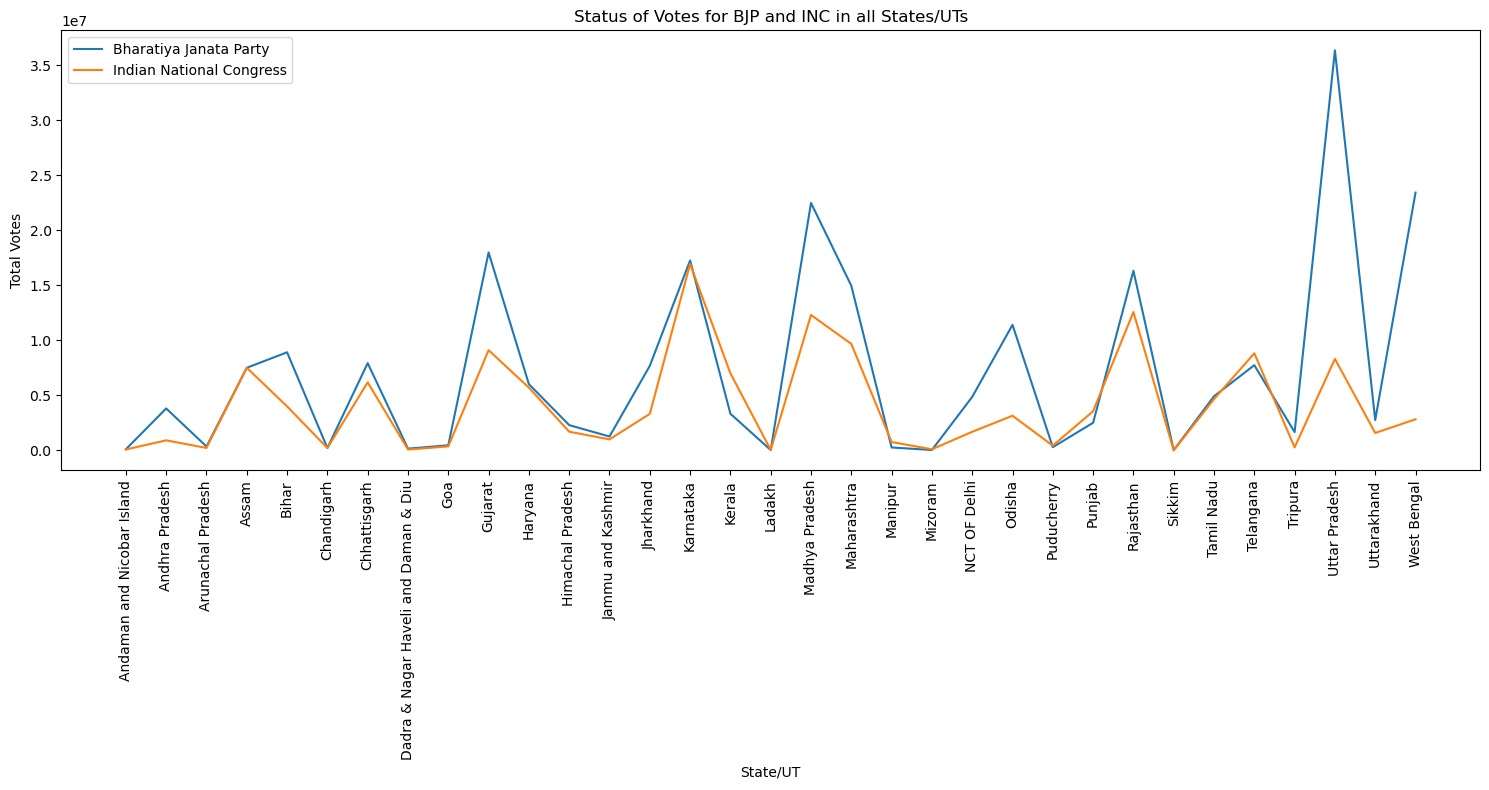

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup (replace with your actual data loading and filtering steps)
data = pd.read_excel('Election dataset.xlsx')
bjp_data = data[data['Party'] == 'Bharatiya Janata Party']
inc_data = data[data['Party'] == 'Indian National Congress']

# Convert 'Total Votes' to numeric, handling errors and filling missing values
bjp_data['Total Votes'] = pd.to_numeric(bjp_data['Total Votes'], errors='coerce').fillna(0)
inc_data['Total Votes'] = pd.to_numeric(inc_data['Total Votes'], errors='coerce').fillna(0)

# Group data by State/UT and calculate sum of votes
bjp_votes_by_state = bjp_data.groupby('State/UT')['Total Votes'].sum().reset_index()
inc_votes_by_state = inc_data.groupby('State/UT')['Total Votes'].sum().reset_index()

# Merge the two DataFrames
merged_data = pd.merge(bjp_votes_by_state, inc_votes_by_state, on='State/UT', suffixes=('_bjp', '_inc'))

# Create the line plot
plt.figure(figsize=(15, 8))
plt.plot(merged_data['State/UT'], merged_data['Total Votes_bjp'], label='Bharatiya Janata Party')
plt.plot(merged_data['State/UT'], merged_data['Total Votes_inc'], label='Indian National Congress')

# Add labels and title
plt.xlabel('State/UT')
plt.ylabel('Total Votes')
plt.title('Status of Votes for BJP and INC in all States/UTs')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the legend and plot
plt.legend()
plt.tight_layout()
plt.show()


In [53]:
#no of constituency won by each party, winner is the one with max votes

def get_winner_by_constituency(data):
  """
  Returns a dictionary where the keys are constituencies and the values are the
  names of the candidates who won the most votes in that constituency.
  """
  winner_by_constituency = {}
  for constituency, group in data.groupby("Constituency"):
    winner_name = group["Candidate"].loc[group["Total Votes"] == group["Total Votes"].max()].iloc[0]
    winner_by_constituency[constituency] = winner_name
  return winner_by_constituency

# Get the number of constituencies won by each party
party_wins = {}
for constituency, winner_name in get_winner_by_constituency(data).items():
  party = data.loc[data["Candidate"] == winner_name, "Party"].iloc[0]
  if party not in party_wins:
    party_wins[party] = 0
  party_wins[party] += 1

# Print the results
for party, wins in party_wins.items():
  print(f"{party}: {wins}")


Bharatiya Janata Party: 238
Indian National Congress: 98
Jammu & Kashmir National Conference: 2
Dravida Munnetra Kazhagam: 22
Nationalist Congress Party – Sharadchandra Pawar: 8
Telugu Desam: 16
Samajwadi Party: 36
Aam Aadmi Party: 3
Yuvajana Sramika Rythu Congress Party: 4
All India Trinamool Congress: 29
Communist Party of India (Marxist-Leninist) (Liberation): 2
Shiv Sena: 7
Independent: 9
Rashtriya Lok Dal: 2
Janata Dal (United): 12
Asom Gana Parishad: 1
Shiromani Akali Dal: 1
Rashtriya Janata Dal: 3
Viduthalai Chiruthaigal Katchi: 2
Communist Party of India (Marxist): 4
Jharkhand Mukti Morcha: 3
AJSU Party: 1
Lok Janshakti Party(Ram Vilas): 5
All India Majlis-E-Ittehadul Muslimeen: 1
Janasena Party: 2
United People’s Party, Liberal: 1
Janata Dal (Secular): 2
Revolutionary Socialist Party: 1
Kerala Congress: 1
Zoram People’s Movement: 1
Indian Union Muslim League: 3
Apna Dal (Soneylal): 1
Shiv Sena (Uddhav Balasaheb Thackrey): 9
Communist Party of India: 2
Rashtriya Loktantrik Part

In [52]:

rahul_votes = data[data['Candidate'] == 'RAHUL GANDHI']['Total Votes'].sum()
modi_votes = data[data['Candidate'] == 'NARENDRA MODI']['Total Votes'].sum()
shah_votes = data[data['Candidate'] == 'AMIT SHAH']['Total Votes'].sum()

print(f"Rahul Gandhi: {rahul_votes}")
print(f"Narendra Modi: {modi_votes}")
print(f"Amit Shah: {shah_votes}")


Rahul Gandhi: 1335094
Narendra Modi: 612970
Amit Shah: 1010972
